In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import confusion_matrix,accuracy_score

import tensorflow as tf # This tells Colab that we are using TensorFlow

from tensorflow import keras # This is the main TensorFlow library
from tensorflow.keras import layers # We are building a Neural Network with several hidden layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.models import Sequential
from keras.layers import Dense

In [2]:
wnv_data = pd.read_csv("https://raw.githubusercontent.com/svuyyuru4066751/IT-533-Week-15/main/West_Nile_Virus__WNV__Mosquito_Test_Results.csv")
wnv_data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,GRAVID,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,GRAVID,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,GRAVID,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,GRAVID,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,GRAVID,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [3]:
### Transform one attribute from categorical or string to numeric

wnv_data['TRAP_TYPE'] = wnv_data['TRAP_TYPE'].astype('category')
wnv_data['TRAP_TYPE'] = wnv_data['TRAP_TYPE'].cat.codes
wnv_data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,1,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,1,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,1,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,1,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,1,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


In [4]:
### Normalize or standardize this attribute.

means = np.mean(wnv_data['TRAP_TYPE'],axis=0)
std = np.std(wnv_data['TRAP_TYPE'], axis=0)
wnv_data['TRAP_TYPE'] = (wnv_data['TRAP_TYPE'] - means)/std

In [5]:
wnv_data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,8,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,39,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,50,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,17,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,12,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### Transform a second attribute from numeric to 5 categories: xs -- s -- m -- l -- xl. Put these values into their OWN column.

In [6]:
bins = np.linspace(wnv_data['NUMBER OF MOSQUITOES'].min(),wnv_data['NUMBER OF MOSQUITOES'].max(),6)
print(bins)
labels = ['xs','s','m','l','xl']
wnv_data['NUMBER OF MOSQUITOES'] = pd.cut(wnv_data['NUMBER OF MOSQUITOES'], bins=bins, labels=labels, include_lowest=True)
wnv_data.head()

[ 1.  16.2 31.4 46.6 61.8 77. ]


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,m,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,l,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,s,positive,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN


### In a third attribute, find all the missing values and substitute them with "null"

In [7]:
wnv_data['LATITUDE'].isnull().sum()

4416

In [8]:
wnv_data['LATITUDE'].fillna("null",inplace=True)
wnv_data['LATITUDE'].isnull().sum()

0

###Perform a 5-number summary for another numerical attribute.

In [9]:
wnv_data['WEEK'].describe()

count    29489.000000
mean        31.073587
std          4.533390
min         20.000000
25%         28.000000
50%         31.000000
75%         35.000000
max         40.000000
Name: WEEK, dtype: float64

In [10]:
wnv_data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,100XX W OHARE AIRPORT,T902,0.084552,09/25/2014 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN
1,2016,37,44219,100XX W OHARE AIRPORT,T902,0.084552,09/15/2016 12:09:00 AM,m,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN
2,2017,33,45351,100XX W OHARE AIRPORT,T905,0.084552,08/17/2017 12:08:00 AM,l,positive,CULEX PIPIENS/RESTUANS,null,NaN,NaN
3,2017,33,45345,100XX W OHARE AIRPORT,T900,0.084552,08/17/2017 12:08:00 AM,s,positive,CULEX PIPIENS/RESTUANS,null,NaN,NaN
4,2016,37,44169,4XX W 127TH,T135,0.084552,09/15/2016 12:09:00 AM,xs,negative,CULEX PIPIENS/RESTUANS,null,NaN,NaN


In [11]:
x = wnv_data.drop(['NUMBER OF MOSQUITOES'],axis=1)
y=wnv_data['NUMBER OF MOSQUITOES']

In [12]:
print([i for i in x.columns if x[i].dtype=='object'])

['BLOCK', 'TRAP', 'TEST DATE', 'RESULT', 'SPECIES', 'LATITUDE', 'LOCATION']


In [14]:
col = ['BLOCK', 'TRAP', 'TEST DATE', 'RESULT', 'SPECIES', 'LATITUDE', 'LOCATION','LATITUDE']

for i in col:
  wnv_data[i] = wnv_data[i].astype('category')
  wnv_data[i] = wnv_data[i].cat.codes

wnv_data.fillna(0,inplace=True)

In [15]:
wnv_data.head()

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
0,2014,39,40542,1,171,0.084552,284,xs,0,2,162,0.0,0
1,2016,37,44219,1,171,0.084552,260,m,0,2,162,0.0,0
2,2017,33,45351,1,174,0.084552,190,l,1,2,162,0.0,0
3,2017,33,45345,1,169,0.084552,190,s,1,2,162,0.0,0
4,2016,37,44169,97,106,0.084552,260,xs,0,2,162,0.0,0


### Split the dataset into 40% training set and 20% test set with sampling

In [16]:
X = wnv_data.drop(['NUMBER OF MOSQUITOES'],axis=1)
Y=wnv_data['NUMBER OF MOSQUITOES']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20)

### Split the dataset into 75% training set and 25% test set with crossvalidation

In [32]:
X = wnv_data.drop(['NUMBER OF MOSQUITOES'],axis=1)
Y=wnv_data['NUMBER OF MOSQUITOES']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25)
X_train

,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION
15433,2009,36,28069,145,151,0.084552,257,0,3,45,-87.731550,46
672,2019,25,48072,135,159,0.084552,35,0,3,159,-87.806797,160
11749,2007,28,20900,21,102,-3.462184,141,0,1,8,-87.590180,9
138,2019,23,47758,68,13,0.084552,19,0,2,120,-87.832942,121
9742,2011,33,32206,10,129,0.084552,194,0,2,23,-87.682260,24
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,2019,31,48834,1,169,0.084552,148,0,2,162,0.000000,0
22486,2014,37,40159,133,10,0.084552,249,0,2,157,-87.778235,158
6810,2007,33,22646,73,140,0.084552,201,0,6,18,-87.531060,19
11172,2014,24,38074,102,100,0.084552,18,0,3,68,-87.736925,69


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
kf = KFold(n_splits=4)
for train_index, test_index in kf.split(x):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 7373  7374  7375 ... 29486 29487 29488] TEST: [   0    1    2 ... 7370 7371 7372]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [ 7373  7374  7375 ... 14742 14743 14744]
TRAIN: [    0     1     2 ... 29486 29487 29488] TEST: [14745 14746 14747 ... 22114 22115 22116]
TRAIN: [    0     1     2 ... 22114 22115 22116] TEST: [22117 22118 22119 ... 29486 29487 29488]


In [20]:
X_train.shape,X_test.shape

((22117, 12), (7372, 12))

### Pick the 3 most important attributes and make a correlation matrix

In [21]:
wnv_data[['TRAP_TYPE','SPECIES','RESULT','SEASON YEAR']].corr()

,TRAP_TYPE,SPECIES,RESULT,SEASON YEAR
TRAP_TYPE,1.000000,0.120290,0.026099,0.292849
SPECIES,0.120290,1.000000,-0.062797,0.195687
RESULT,0.026099,-0.062797,1.000000,0.095773
SEASON YEAR,0.292849,0.195687,0.095773,1.000000


### Find a dependent attribute and build one of the options below

In [22]:
# Splitting into Training and Test Set
train_dataset = wnv_data.sample(frac=0.25, random_state=0)
test_dataset = wnv_data.drop(train_dataset.index)

# Splitting Features from Labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('NUMBER OF MOSQUITOES')
test_labels = test_features.pop('NUMBER OF MOSQUITOES')

In [23]:
# Encoding the output variable with pd.get_dummies
train_labels1 = pd.get_dummies(train_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')
test_labels1 = pd.get_dummies(test_labels, columns=['NUMBER OF MOSQUITOES'], prefix='', prefix_sep='')

In [24]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
normalizer.mean.numpy()

array([[ 2.0124436e+03,  3.1052910e+01,  3.5016016e+04,  6.9684212e+01,
         9.1798859e+01, -1.7924173e-02,  1.5500320e+02,  8.8578410e-02,
         2.3307104e+00,  9.1717476e+01, -7.4995811e+01,  6.9125366e+01]],
      dtype=float32)

In [25]:
# define the Keras model
model = Sequential(normalizer)
model.add(Dense(12, input_dim=32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 12)                25        
 on)                                                             
                                                                 
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 1818 (7.11 KB)
Trainable params: 1793 (7.00 KB)
Non-trainable params: 25 (104.00 Byte)
_____________________

In [26]:
%%time

# compile the Keras model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
# fit the Keras model on the dataset
model.fit(train_features, train_labels1, epochs=20, batch_size=10)

Epoch 1/20
738/738 [==============================] - 9s 4ms/step - loss: 0.8223 - accuracy: 0.7454
Epoch 2/20
738/738 [==============================] - 4s 5ms/step - loss: 0.7118 - accuracy: 0.7763
Epoch 3/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6960 - accuracy: 0.7788
Epoch 4/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6858 - accuracy: 0.7781
Epoch 5/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6773 - accuracy: 0.7804
Epoch 6/20
738/738 [==============================] - 4s 5ms/step - loss: 0.6713 - accuracy: 0.7812
Epoch 7/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6679 - accuracy: 0.7800
Epoch 8/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6656 - accuracy: 0.7816
Epoch 9/20
738/738 [==============================] - 3s 4ms/step - loss: 0.6611 - accuracy: 0.7835
Epoch 10/20
738/738 [==============================] - 4s 5ms/step - loss: 0.6571 - accuracy: 0.7834

In [27]:
# evaluate the keras model
accuracy = model.evaluate(test_features, test_labels1)
print('Accuracy: %.2f' % (accuracy[1]*100))

692/692 [==============================] - 2s 3ms/step - loss: 0.6757 - accuracy: 0.7779
Accuracy: 77.79


692/692 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.79      0.98      0.88     16626
           1       0.29      0.01      0.03      2317
           2       0.00      0.00      0.00      1259
           3       0.57      0.42      0.48      1914
           4       0.00      0.00      0.00         1

    accuracy                           0.78     22117
   macro avg       0.33      0.28      0.28     22117
weighted avg       0.68      0.78      0.71     22117



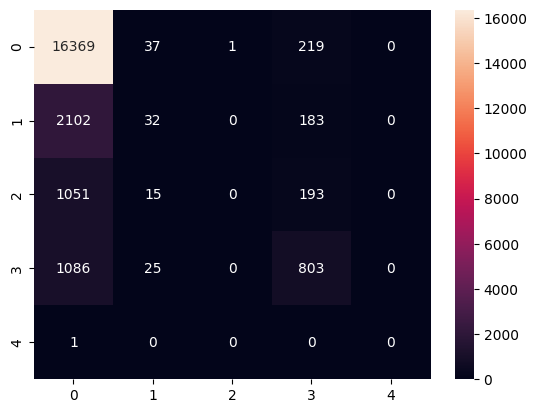

In [28]:
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix
pred = model.predict(test_features)
sns.heatmap(confusion_matrix(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)), annot=True, fmt='d')
print(classification_report(np.argmax(np.array(test_labels1),axis=1),np.argmax(pred,axis=1)))

In [29]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [30]:
X_train.isnull().sum()

SEASON YEAR       0
WEEK              0
TEST ID           0
BLOCK             0
TRAP              0
TRAP_TYPE         0
TEST DATE         0
RESULT            0
SPECIES           0
LATITUDE          0
LONGITUDE      4416
LOCATION       4416
dtype: int64

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
accuracy = model.score(X_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  75.46453275464533 %


In [36]:
y_pred = model.predict(X_test)
y_pred

array(['xs', 'xs', 'xs', ..., 'xs', 'xs', 'xs'], dtype=object)

<Axes: >

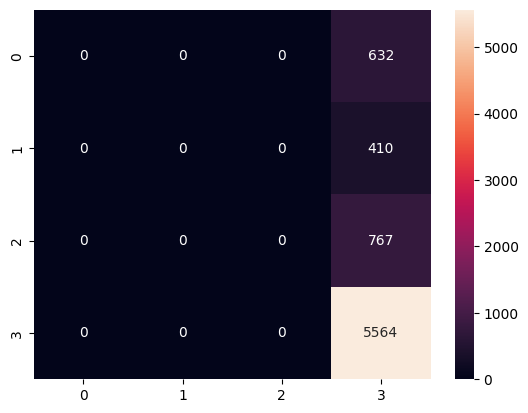

In [37]:
# Next, the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           l       0.58      0.63      0.61       632
           m       0.19      0.11      0.14       410
           s       0.24      0.12      0.16       767
          xs       0.87      0.95      0.91      5564

    accuracy                           0.79      7373
   macro avg       0.47      0.45      0.45      7373
weighted avg       0.74      0.79      0.76      7373



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier()

In [43]:
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7874677878746779

              precision    recall  f1-score   support

           l       0.58      0.63      0.61       632
           m       0.19      0.11      0.14       410
           s       0.24      0.12      0.16       767
          xs       0.87      0.95      0.91      5564

    accuracy                           0.79      7373
   macro avg       0.47      0.45      0.45      7373
weighted avg       0.74      0.79      0.76      7373



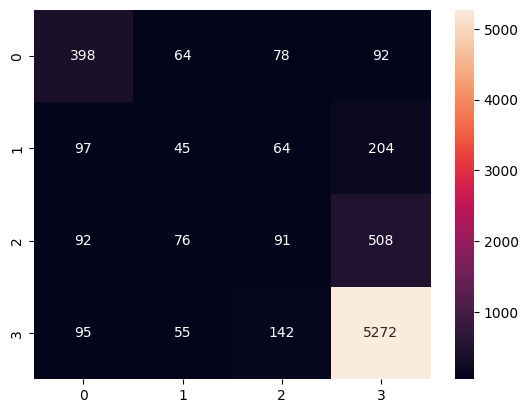

In [47]:
sns.heatmap(confusion_matrix( y_test,y_pred),annot=True,fmt='d')
print(classification_report(y_test, y_pred))